In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and prepping data
base_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/"

urls = [
    "processed.cleveland.data",
    "processed.hungarian.data",
    "processed.switzerland.data",
    "processed.va.data"
]

dfs = []

columns = [
 'age','sex','cp','trestbps','chol','fbs','restecg',
 'thalach','exang','oldpeak','slope','ca','thal','target'
]

for url in urls:
    df_temp = pd.read_csv(base_url + url, names=columns, na_values='?')
    dfs.append(df_temp)

df = pd.concat(dfs, ignore_index=True)
df = df.apply(pd.to_numeric, errors='coerce')

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
df[columns] = imputer.fit_transform(df[columns])
df['target'] = (df['target'] > 0).astype(int)

print(f"Dataset shape: {df.shape}")
print(f"Class distribution:\n{df['target'].value_counts()}")

Dataset shape: (920, 14)
Class distribution:
target
1    509
0    411
Name: count, dtype: int64


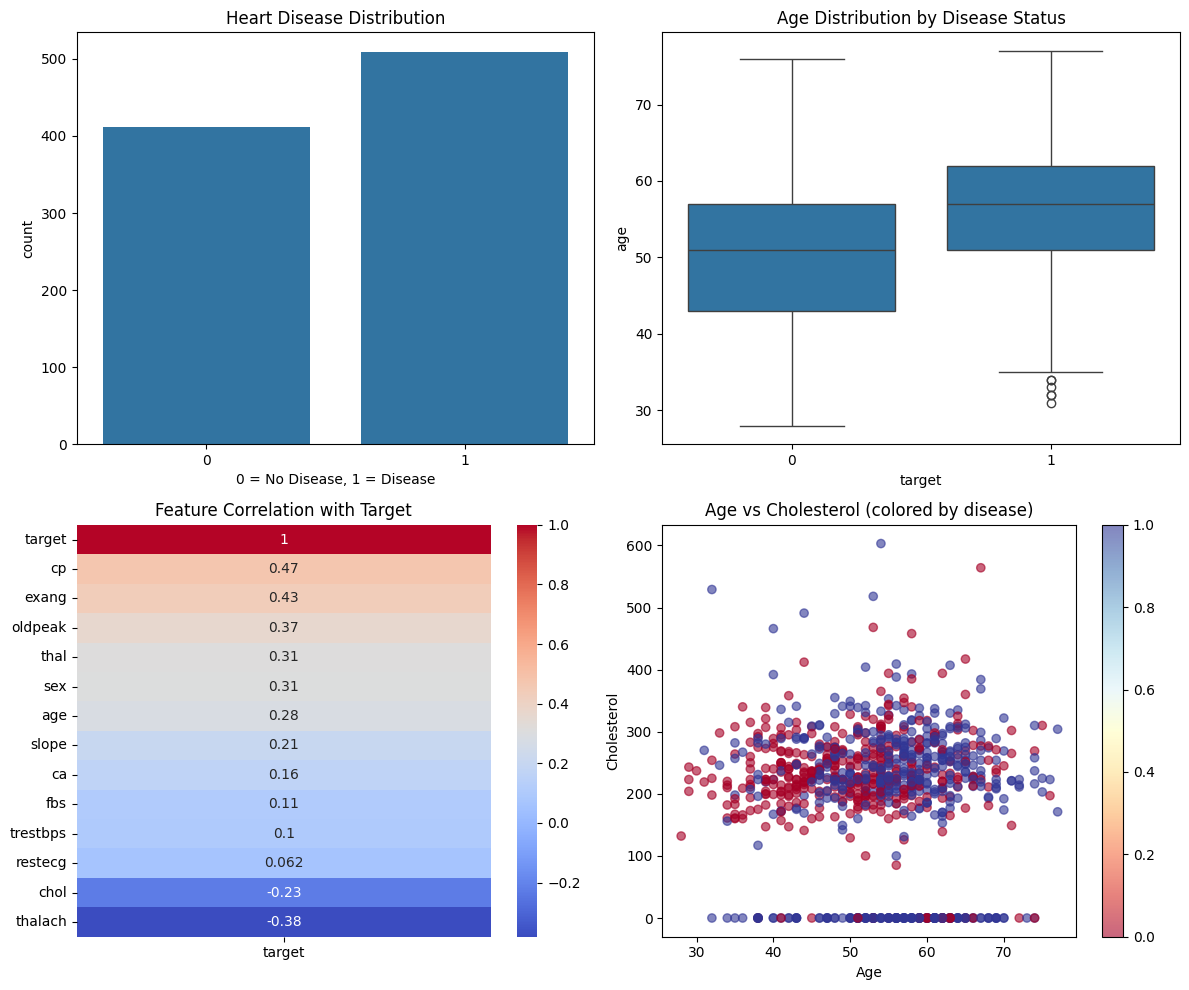

In [2]:
# Visualizing the data
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Class distribution
sns.countplot(data=df, x='target', ax=axes[0, 0])
axes[0, 0].set_title('Heart Disease Distribution')
axes[0, 0].set_xlabel('0 = No Disease, 1 = Disease')

# Age distribution by target
sns.boxplot(data=df, x='target', y='age', ax=axes[0, 1])
axes[0, 1].set_title('Age Distribution by Disease Status')

# Correlation heatmap
correlation = df.corr()
sns.heatmap(correlation[['target']].sort_values(by='target', ascending=False),
            annot=True, cmap='coolwarm', ax=axes[1, 0], cbar=True)
axes[1, 0].set_title('Feature Correlation with Target')

# Cholesterol vs Age
scatter = axes[1, 1].scatter(df['age'], df['chol'], c=df['target'],
                             cmap='RdYlBu', alpha=0.6)
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Cholesterol')
axes[1, 1].set_title('Age vs Cholesterol (colored by disease)')
plt.colorbar(scatter, ax=axes[1, 1])

plt.tight_layout()
plt.show()